In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, RandomizedSearchCV

%matplotlib inline

# Regression

## Reading the dataset

### Dataset Info

https://www.kaggle.com/datasets/maajdl/yeh-concret-data?select=Concrete_Data_Yeh.csv

### Dataset

In [2]:
df = pd.read_csv('Data/Concrete_Data.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
flyash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseaggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineaggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
csMPa,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


#### Pearson's correlation coefficient

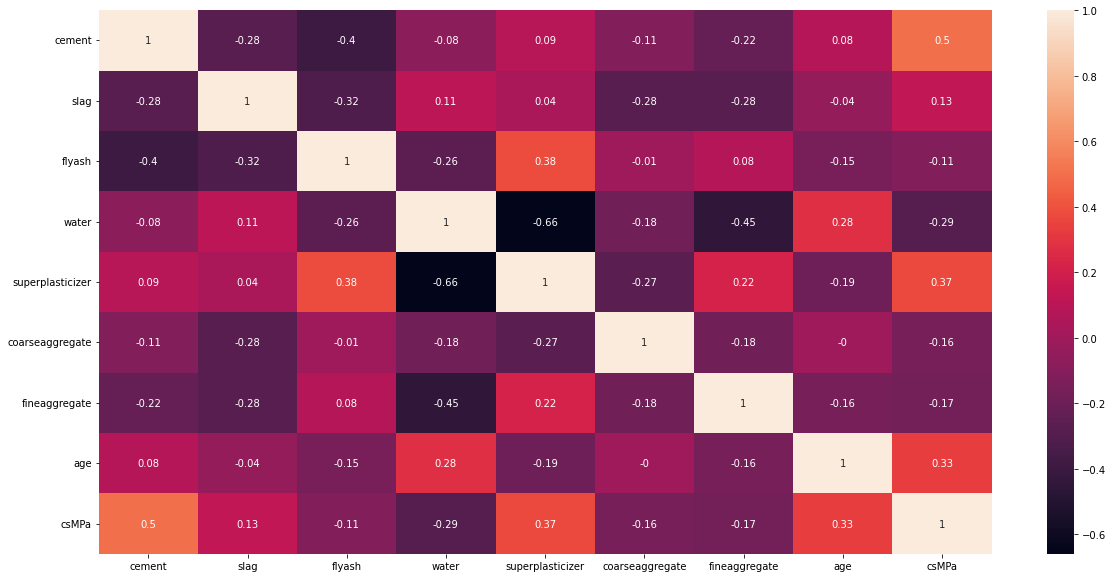

In [77]:
corr = df.corr().apply(lambda x : np.round(x, 2))

plt.figure(figsize = (20,10))
sns.heatmap(data = corr, annot = True)
plt.show()

#### Spearman's correlation rank

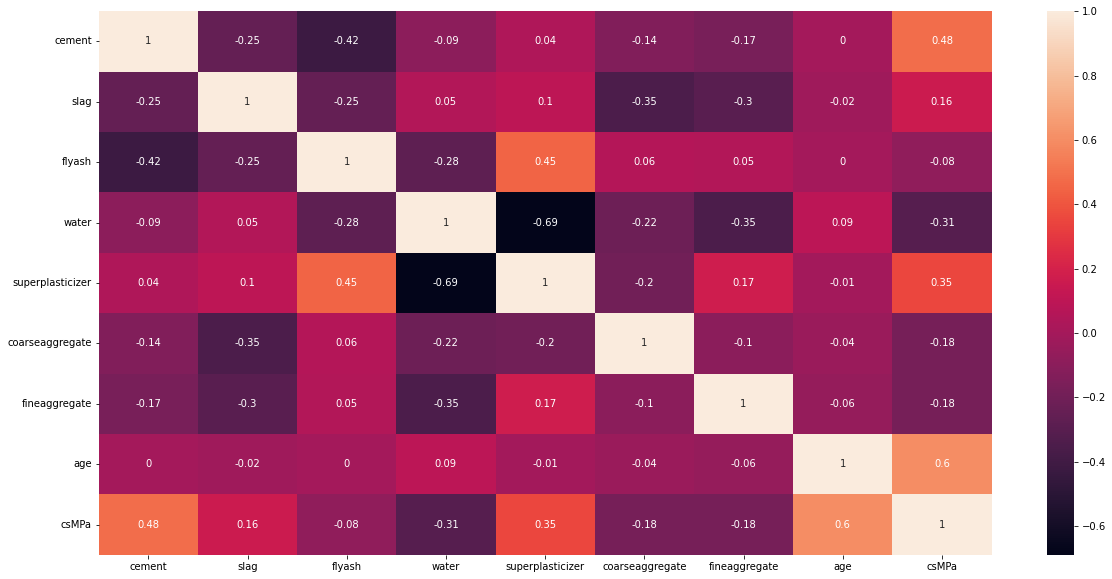

In [78]:
corr = df.corr(method = 'spearman').apply(lambda x : np.round(x, 2))

plt.figure(figsize = (20,10))
sns.heatmap(data = corr, annot = True)
plt.show()

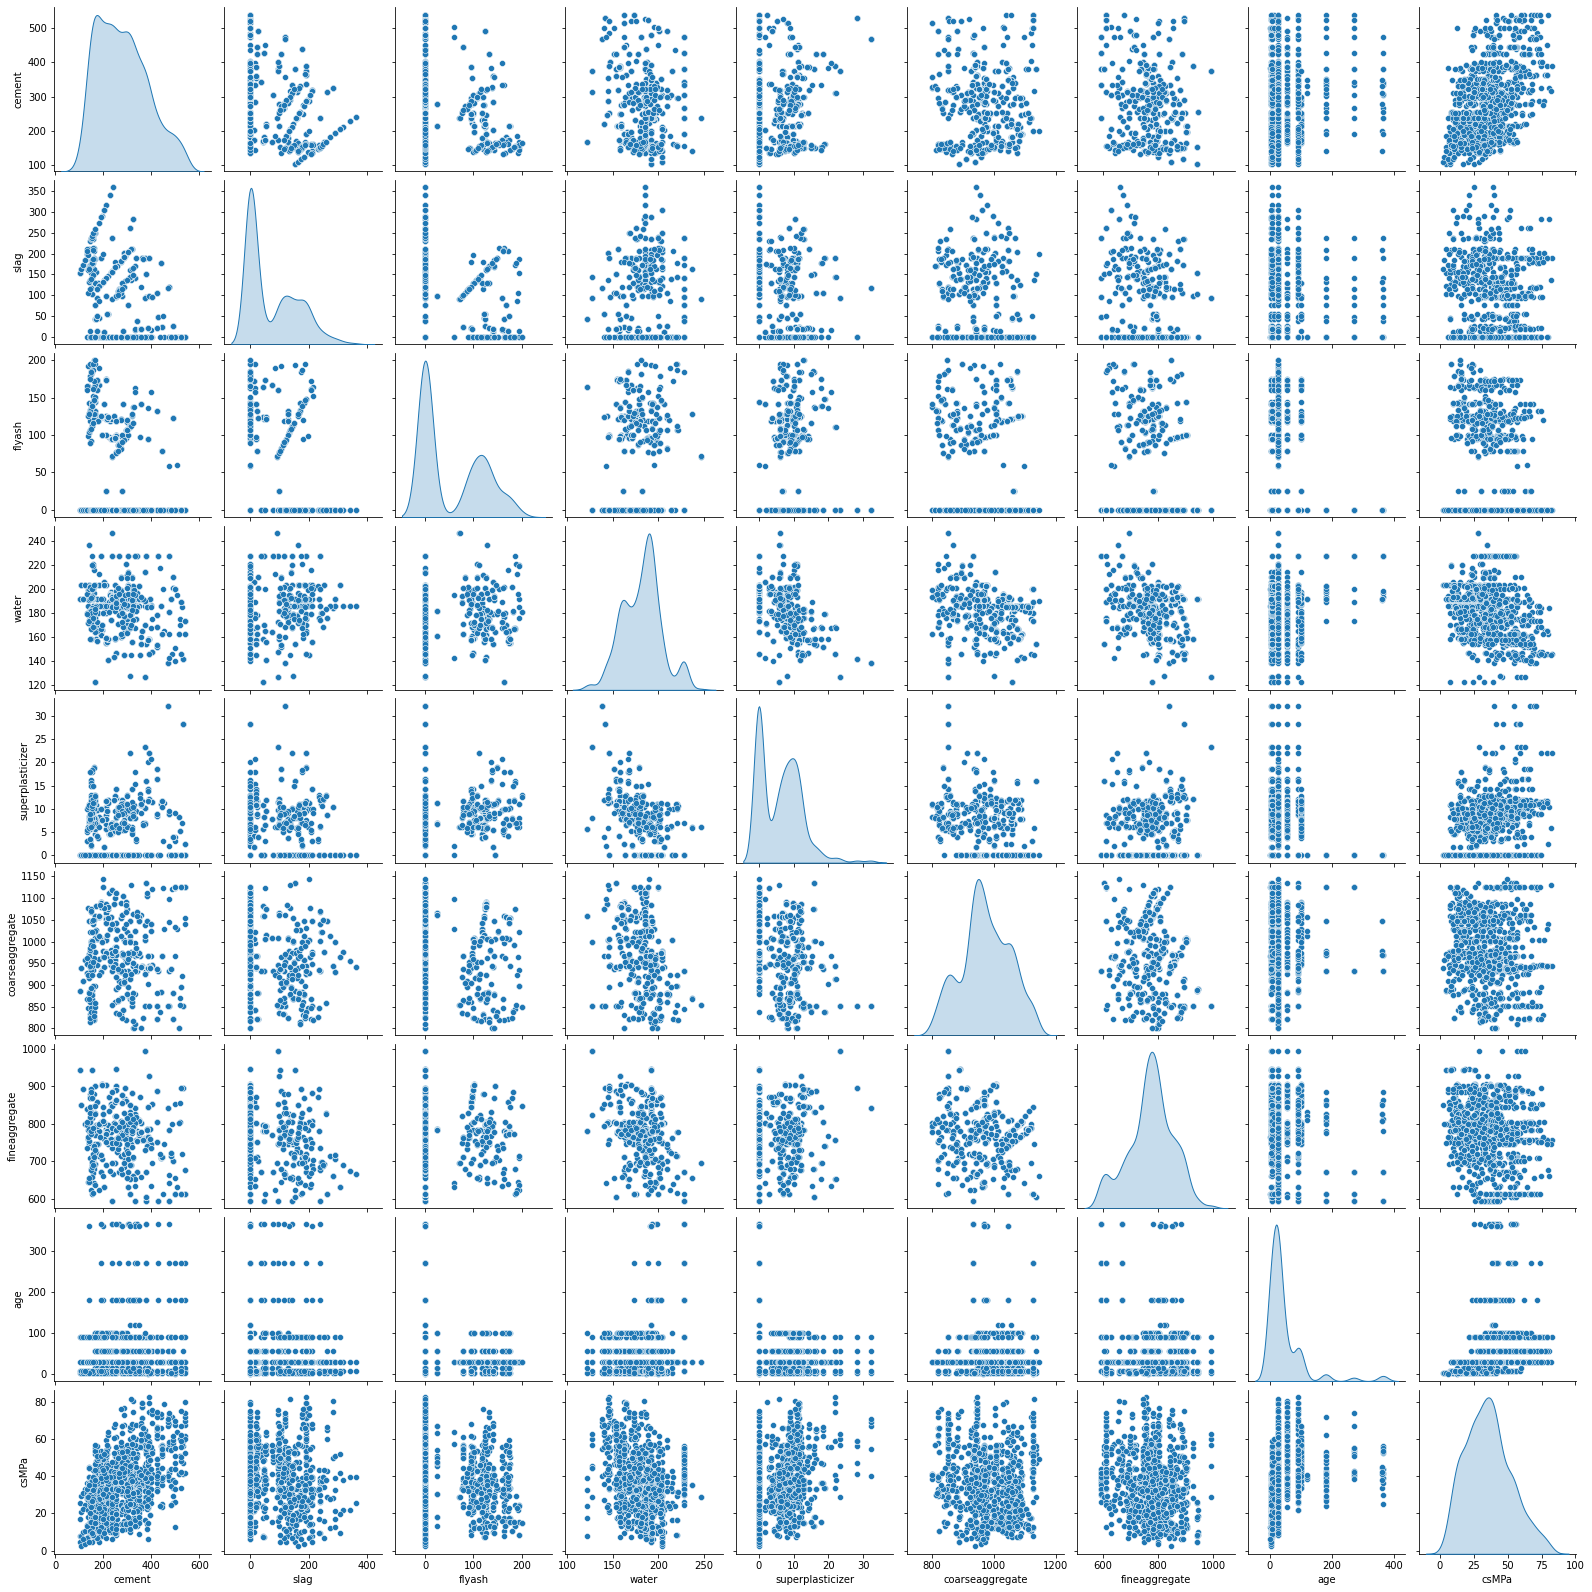

In [3]:
sns.pairplot(df, diag_kind = 'kde')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<AxesSubplot: ylabel='Density'>

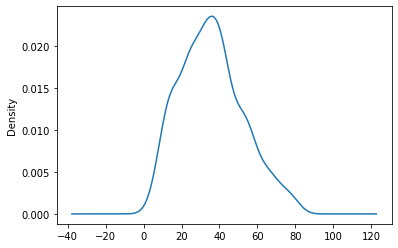

In [6]:
df.csMPa.plot(kind = 'kde')

In [7]:
target = ['csMPa']
x, y = df.drop(columns = target), df[target]

In [8]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.3, random_state = 81)

x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((721, 8), (309, 8), (721, 1), (309, 1))

#### Training the first model

In [9]:
# Badse model
rf_reg1 = RandomForestRegressor(random_state = 81)

# Training the model
rf_reg1.fit(x_tr, y_tr)

# making predictions
pred_y_tr = rf_reg1.predict(x_tr)

pred_y_ts = rf_reg1.predict(x_ts)

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_99056/2401666197.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg1.fit(x_tr, y_tr)


In [10]:
r2_tr_1 = r2_score(y_tr, pred_y_tr)
r2_tr_1

0.985453446430809

In [11]:
r2_ts_1 = r2_score(y_ts, pred_y_ts)
r2_ts_1

0.9084564092121494

In [12]:
mae_tr_1 = mean_absolute_error(y_tr, pred_y_tr)
mae_tr_1

1.3784915226317067

In [13]:
mae_ts_1 = mean_absolute_error(y_ts, pred_y_ts)
mae_ts_1

3.3887140553243937

In [14]:
round(mae_ts_1/mae_tr_1, 2)

2.46

In [15]:
rmse_tr_1 = np.sqrt(mean_squared_error(y_tr, pred_y_tr))
rmse_tr_1

2.0111864105278126

In [16]:
rmse_ts_1 = np.sqrt(mean_squared_error(y_ts, pred_y_ts))
rmse_ts_1

5.05805319412295

In [17]:
round(rmse_ts_1/rmse_tr_1, 2)

2.51

#### Training the second model

In [18]:
# Badse model
rf_reg2 = RandomForestRegressor(n_estimators = 150, random_state = 81)

# Training the model
rf_reg2.fit(x_tr, y_tr)

# making predictions
pred_y_tr = rf_reg2.predict(x_tr)

pred_y_ts = rf_reg2.predict(x_ts)

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_99056/372277108.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg2.fit(x_tr, y_tr)


In [19]:
r2_tr_2 = r2_score(y_tr, pred_y_tr)
r2_tr_2

0.9860528597365312

In [20]:
r2_ts_2 = r2_score(y_ts, pred_y_ts)
r2_ts_2

0.9105721730231264

In [21]:
mae_tr_2 = mean_absolute_error(y_tr, pred_y_tr)
mae_tr_2

1.3591838190637642

In [22]:
mae_ts_2 = mean_absolute_error(y_ts, pred_y_ts)
mae_ts_2

3.3518532249447777

In [23]:
round(mae_ts_2/mae_tr_2, 2)

2.47

In [24]:
rmse_tr_2 = np.sqrt(mean_squared_error(y_tr, pred_y_tr))
rmse_tr_2

1.969313485132955

In [25]:
rmse_ts_2 = np.sqrt(mean_squared_error(y_ts, pred_y_ts))
rmse_ts_2

4.999260409091884

In [26]:
round(rmse_ts_2/rmse_tr_2, 2)

2.54

### Calculating the rate_of_improvisation

In [32]:
100 * round(abs((mae_tr_1 - mae_tr_2)/ mae_tr_1), 4)

1.4000000000000001

In [31]:
100 * round(abs((mae_ts_1 - mae_ts_2)/ mae_ts_1), 4)

1.09

In [33]:
100 * round(abs((rmse_tr_1 - rmse_tr_2)/ rmse_tr_1), 4)

2.08

In [34]:
100 * round(abs((rmse_ts_1 - rmse_ts_2)/ rmse_ts_1), 4)

1.16

### Using Random Forests for feature selection

In [70]:
cols = rf_reg1.feature_names_in_
imps = rf_reg1.feature_importances_

imp_model1 = pd.DataFrame({'FeatureName':cols, 'FeatureImportance':imps})
imp_model1 = imp_model1.sort_values('FeatureImportance', ascending = False)

imp_model1.FeatureImportance = np.round(imp_model1.FeatureImportance * 100, 2)
imp_model1

,FeatureName,FeatureImportance
7,age,35.65
0,cement,27.55
4,superplasticizer,10.57
3,water,9.42
1,slag,7.54
6,fineaggregate,4.16
5,coarseaggregate,2.94
2,flyash,2.18


In [72]:
cols = rf_reg2.feature_names_in_
imps = rf_reg2.feature_importances_

imp_model2 = pd.DataFrame({'FeatureName':cols, 'FeatureImportance':imps})
imp_model2 = imp_model2.sort_values('FeatureImportance', ascending = False)

imp_model2.FeatureImportance = np.round(imp_model2.FeatureImportance * 100, 2)
imp_model2

,FeatureName,FeatureImportance
7,age,35.31
0,cement,28.05
4,superplasticizer,10.18
3,water,9.67
1,slag,7.65
6,fineaggregate,4.14
5,coarseaggregate,2.95
2,flyash,2.05


## Tuning the model

In [85]:
# Initiating the base estimator
base_estimator = RandomForestRegressor(random_state = 81, oob_score = True, n_jobs = -1)

# Generating the parameters-grid
params_grid = {'n_estimators' : np.arange(50,550, 50), 
               'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"], 
               'max_depth' : np.arange(19, 50, 4), 
               'min_samples_split' : np.arange(20, 45, 5)}

# Generating the search object
search_object = RandomizedSearchCV(estimator = base_estimator, 
                                   param_distributions = params_grid, 
                                   n_iter = 30, 
                                   scoring = 'neg_root_mean_squared_error', 
                                   n_jobs = -1, 
                                   cv = 10, 
                                   random_state = 81, 
                                   return_train_score = True)

# Searching for the best possible parameters-space
search_object.fit(x_tr, y_tr)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                                   random_state=81),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': array([19, 23, 27, 31, 35, 39, 43, 47]),
                                        'min_samples_split': array([20, 25, 30, 35, 40]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=81, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [84]:
_scorer.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [90]:
search_object.best_estimator_.feature_importances_

array([0.29181223, 0.07358379, 0.01503435, 0.0944122 , 0.09444343,
       0.01866477, 0.0301247 , 0.38192454])

In [96]:
# Depends on the scorer that we have used for performance tuning
-1 * (search_object.best_score_)

6.207042183742547

In [92]:
# Training performance - r2-score
search_object.best_estimator_.score(x_tr, y_tr)

0.9274139715513261

In [89]:
# Is always r2-score {squared co-efficient or coeff of determination}
search_object.best_estimator_.oob_score_

0.8687850853281535

In [93]:
# Test performance - r2-score
search_object.best_estimator_.score(x_ts, y_ts)

0.8783943038093325

In [94]:
pred_y_tr = search_object.best_estimator_.predict(x_tr)
pred_y_ts = search_object.best_estimator_.predict(x_ts)

In [95]:
mean_absolute_error(y_tr, pred_y_tr), mean_absolute_error(y_ts, pred_y_ts)

(3.402324981533577, 4.301490290250094)

### Second run for hyperparameter tuning

In [97]:
# Initiating the base estimator
base_estimator = RandomForestRegressor(random_state = 81, oob_score = True, n_jobs = -1)

# Generating the parameters-grid
params_grid = {'n_estimators' : np.arange(50,550, 50), 
               'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"], 
               'max_depth' : np.arange(19, 50, 4), 
               'min_samples_split' : np.arange(20, 45, 5)}

# Generating the search object
search_object_2 = RandomizedSearchCV(estimator = base_estimator, 
                                   param_distributions = params_grid, 
                                   n_iter = 10, 
                                   scoring = 'neg_mean_absolute_error', 
                                   n_jobs = -1, 
                                   cv = 10, 
                                   random_state = 81, 
                                   return_train_score = True)

# Searching for the best possible parameters-space
search_object_2.fit(x_tr, y_tr)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                                   random_state=81),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': array([19, 23, 27, 31, 35, 39, 43, 47]),
                                        'min_samples_split': array([20, 25, 30, 35, 40]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=81, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [99]:
search_object_2.best_estimator_.feature_importances_

array([0.29181223, 0.07358379, 0.01503435, 0.0944122 , 0.09444343,
       0.01866477, 0.0301247 , 0.38192454])

In [100]:
# Depends on the scorer that we have used for performance tuning
-1 * (search_object_2.best_score_)

6.207042183742547

In [101]:
# Training performance - r2-score
search_object_2.best_estimator_.score(x_tr, y_tr)

0.9274139715513261

In [102]:
# Is always r2-score {squared co-efficient or coeff of determination}
search_object_2.best_estimator_.oob_score_

0.8687850853281535

In [103]:
# Test performance - r2-score
search_object_2.best_estimator_.score(x_ts, y_ts)

0.8783943038093325

In [104]:
pred_y_tr = search_object_2.best_estimator_.predict(x_tr)
pred_y_ts = search_object_2.best_estimator_.predict(x_ts)

In [105]:
mean_absolute_error(y_tr, pred_y_tr), mean_absolute_error(y_ts, pred_y_ts)

(3.402324981533577, 4.301490290250094)